In [158]:
import pandas as pd
import numpy as np
import random
import string

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [159]:
data = pd.read_csv("hackathon_startup_week.csv")

In [160]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time
0,2019-01-01 00:31:51,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911
1,2019-01-01 00:41:45,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505
2,2019-01-01 00:50:53,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053
3,2019-01-01 01:32:28,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548
4,2019-01-01 02:26:14,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43864 entries, 0 to 43863
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  43864 non-null  object 
 1   cc_num                 43864 non-null  int64  
 2   merchant               43864 non-null  object 
 3   category               43864 non-null  object 
 4   amt                    43864 non-null  float64
 5   trans_num              43864 non-null  object 
 6   unix_time              43864 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [162]:
data['amt'] = data['amt'].astype(float)


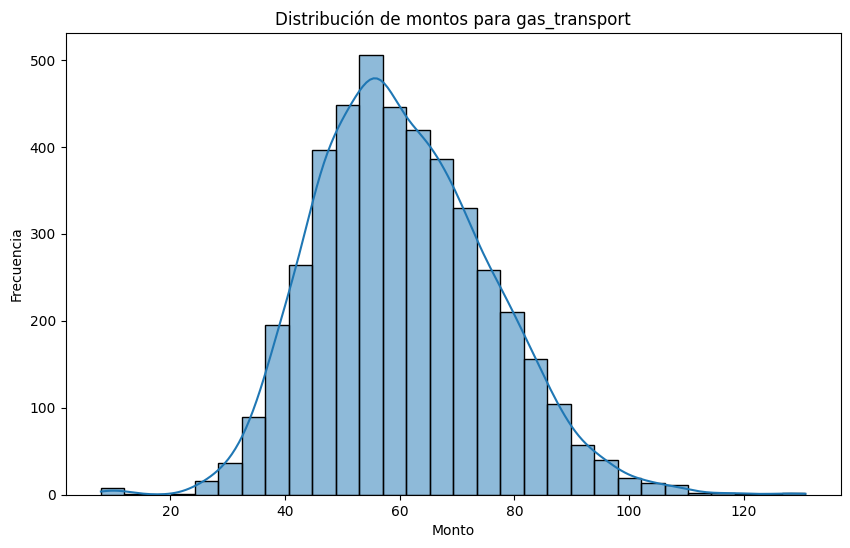

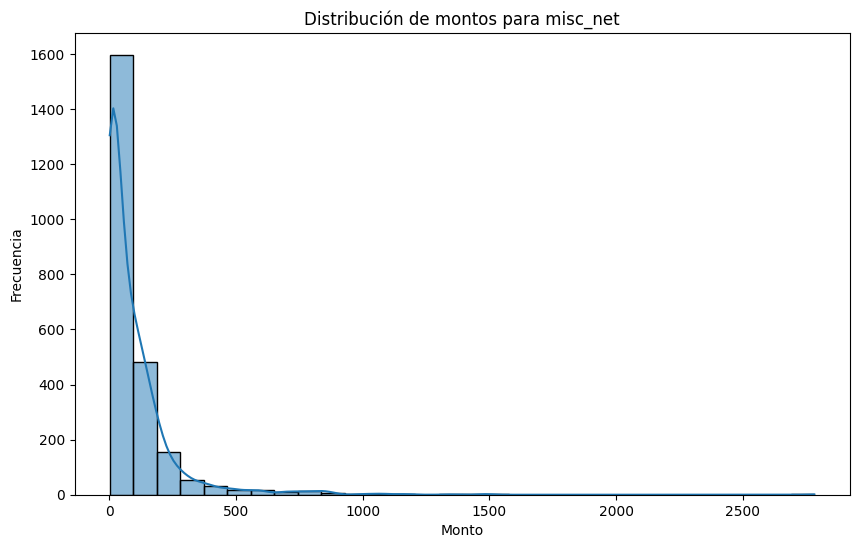

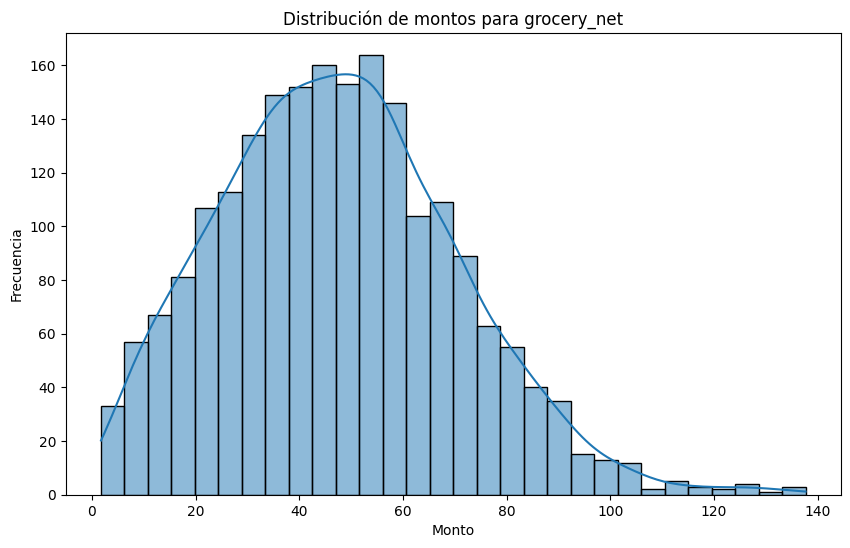

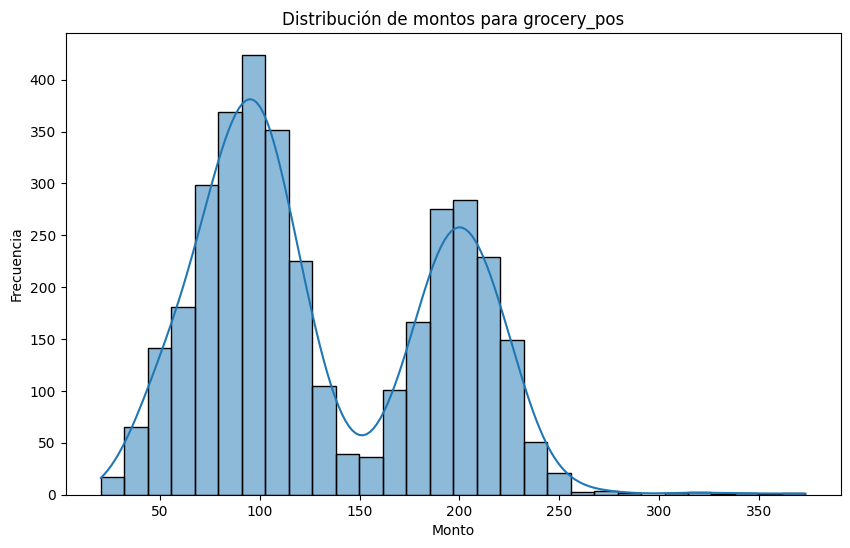

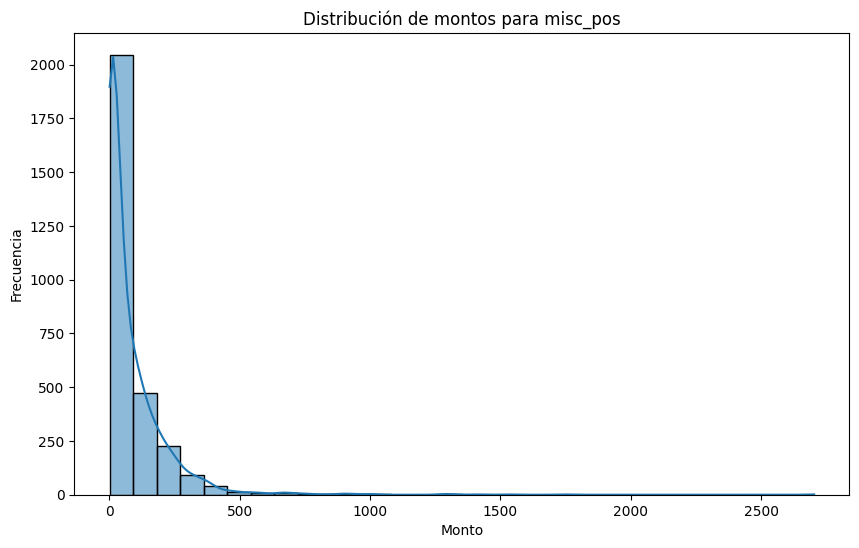

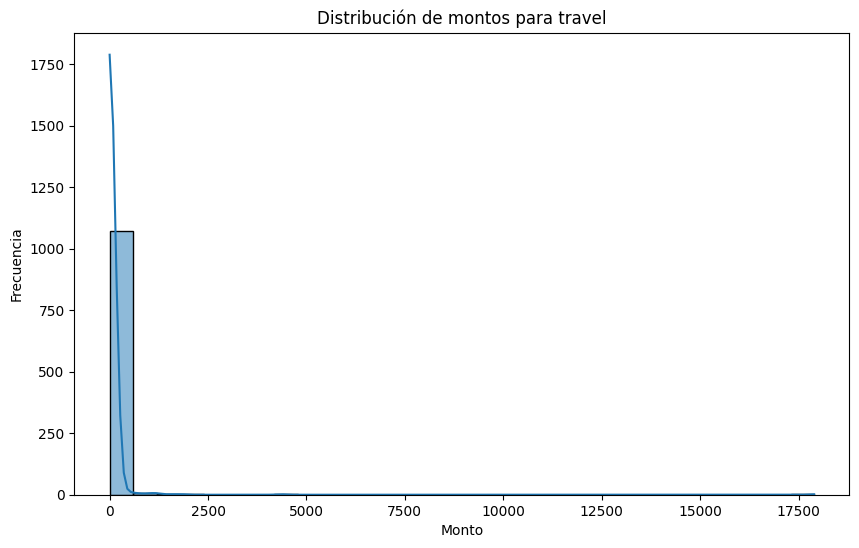

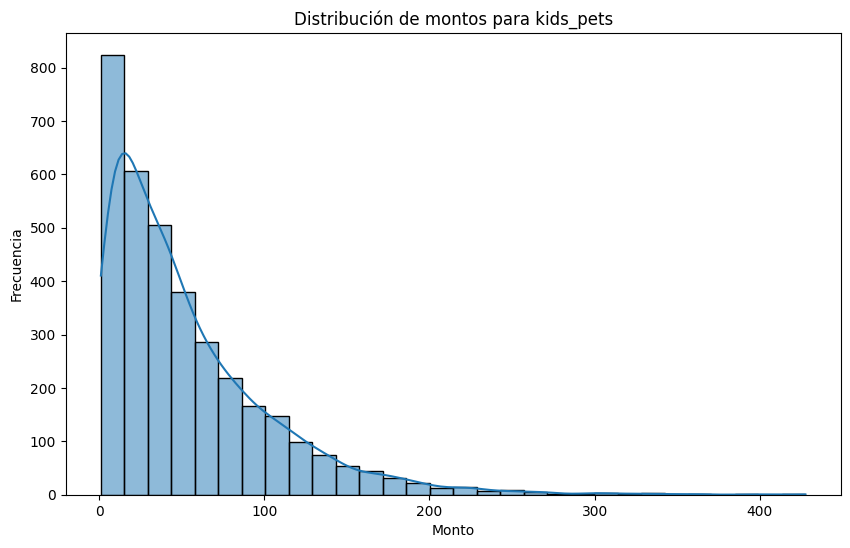

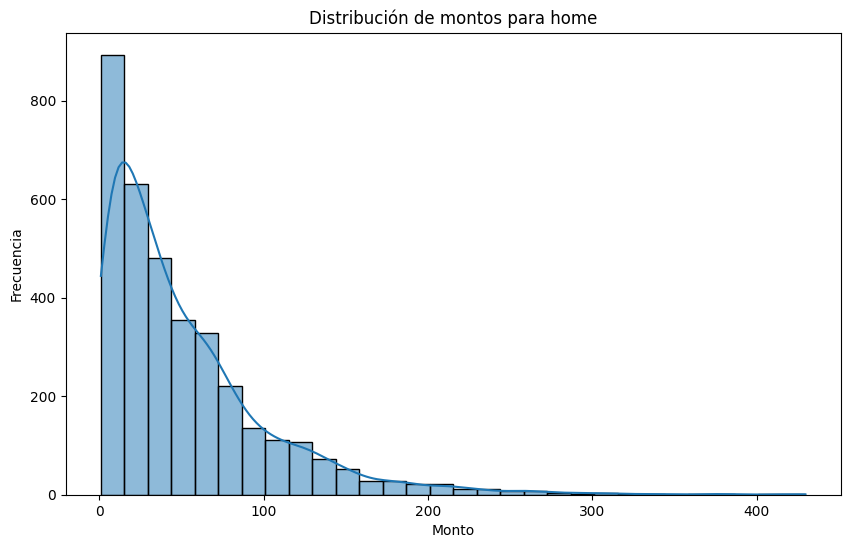

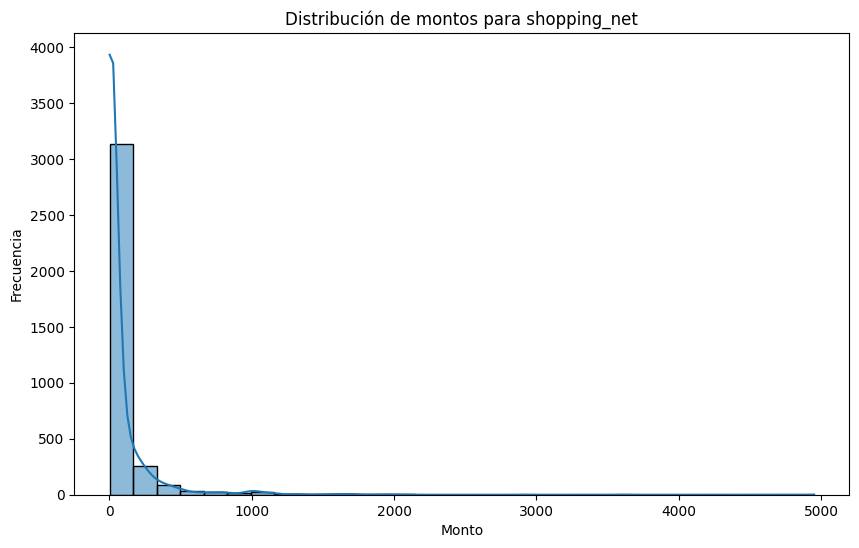

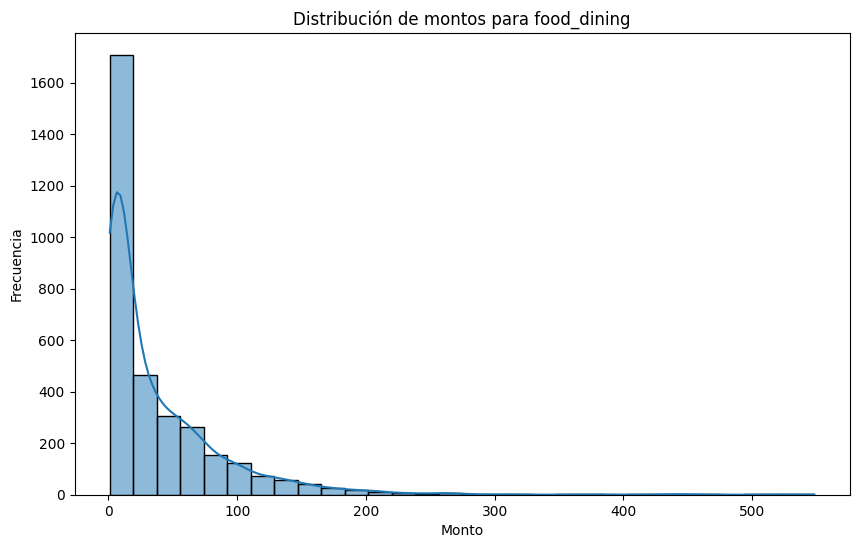

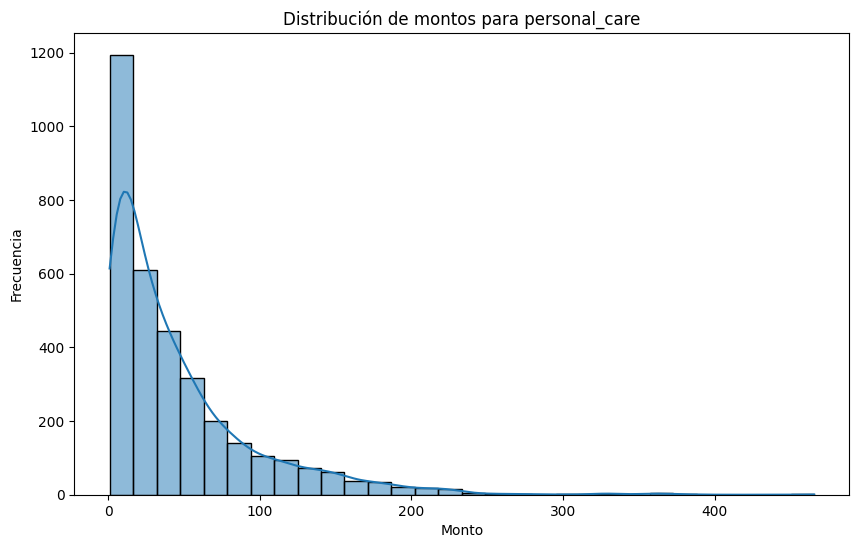

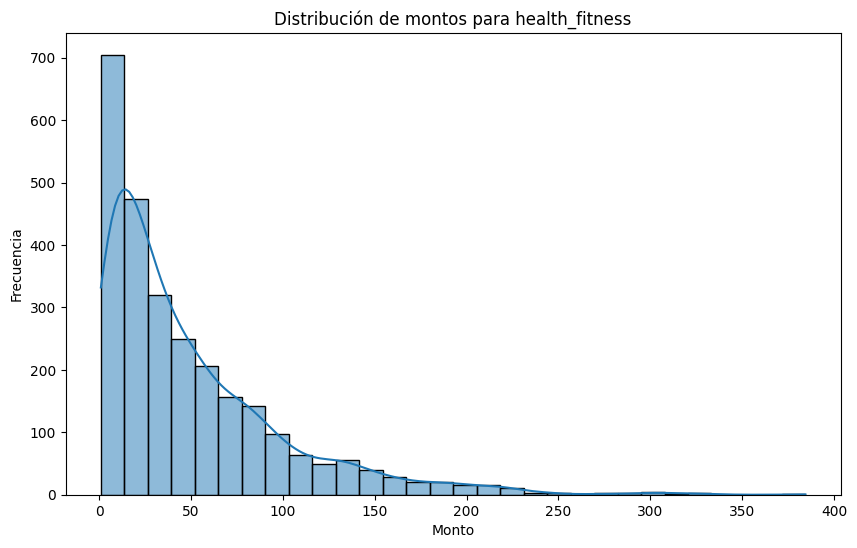

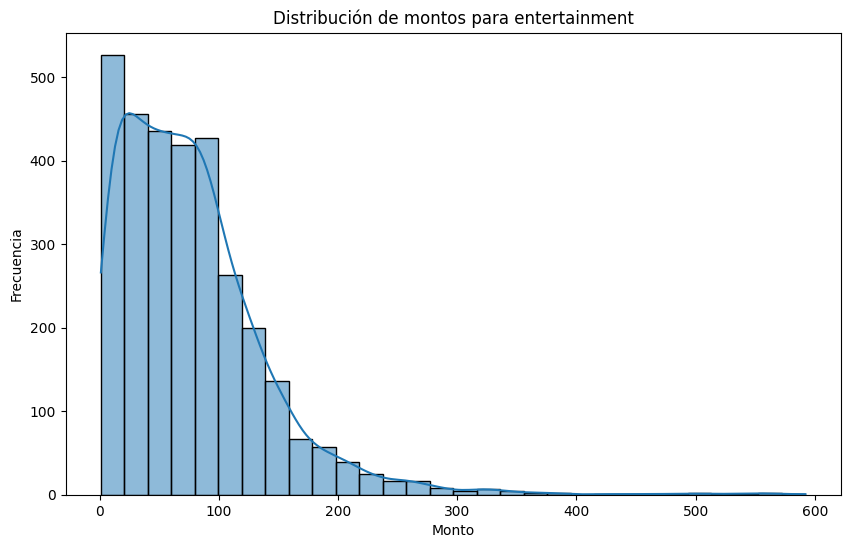

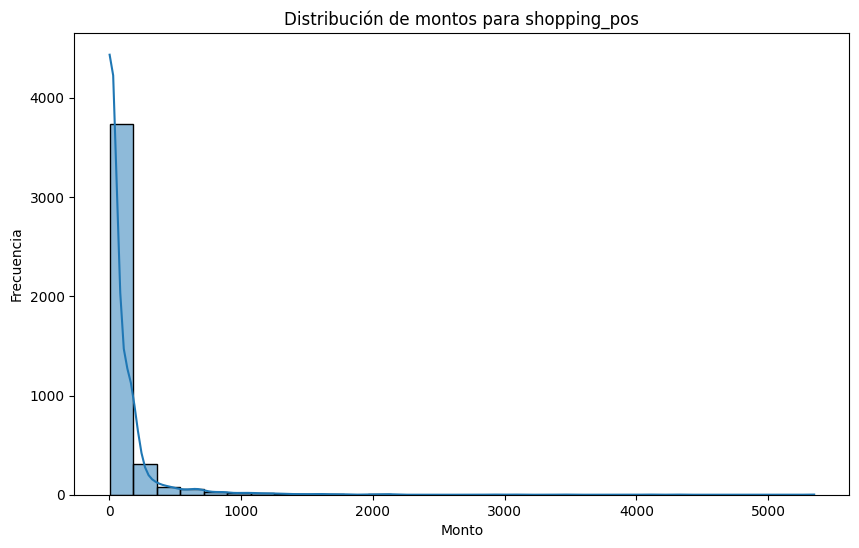

In [163]:
# Asumiendo que 'category' es la columna de categorías y 'amt' los montos
categories = data['category'].unique()
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[data['category'] == category]['amt'], bins=30, kde=True)
    plt.title(f'Distribución de montos para {category}')
    plt.xlabel('Monto')
    plt.ylabel('Frecuencia')
    plt.show()


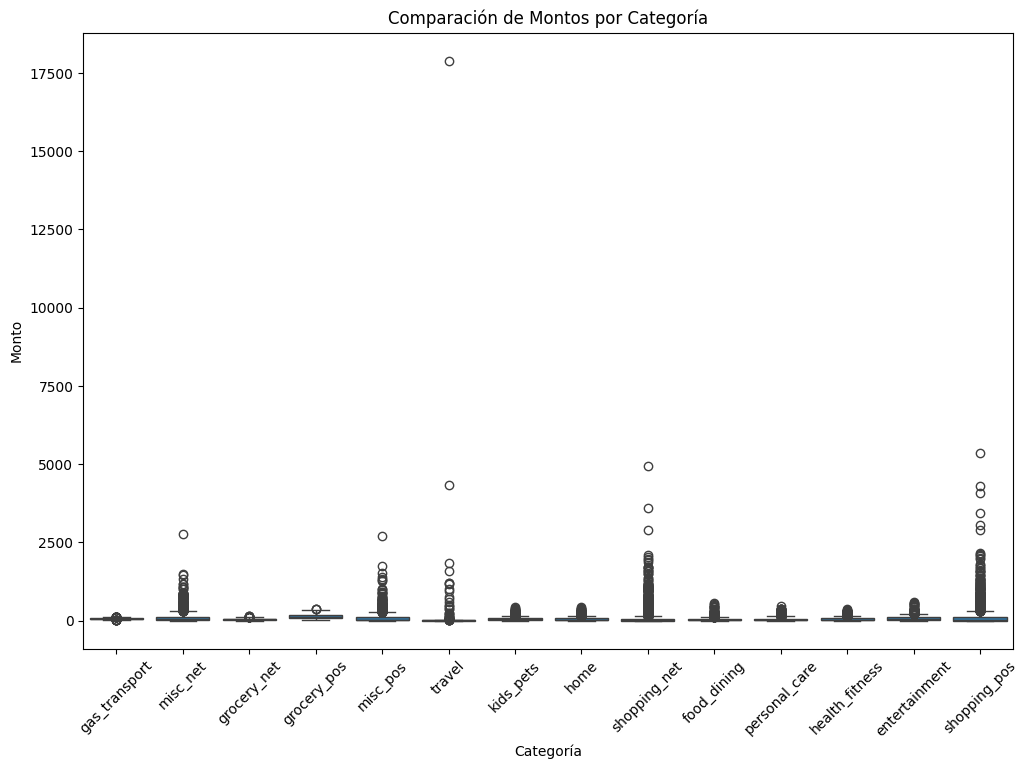

In [164]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='amt', data=data)
plt.xticks(rotation=45)
plt.title('Comparación de Montos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto')
plt.show()


In [165]:
data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"]).dt.date
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time
0,2019-01-01,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911
1,2019-01-01,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505
2,2019-01-01,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053
3,2019-01-01,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548
4,2019-01-01,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774


In [166]:
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')


In [167]:
data['category'] = data['category'].astype('category')


In [168]:
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')

In [169]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'trans_num', 'unix_time'],
      dtype='object')

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43864 entries, 0 to 43863
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   trans_date_trans_time  43864 non-null  object  
 1   cc_num                 43864 non-null  int64   
 2   merchant               43864 non-null  object  
 3   category               43864 non-null  category
 4   amt                    43864 non-null  float64 
 5   trans_num              43864 non-null  object  
 6   unix_time              43864 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 2.1+ MB


In [171]:
# Agrupar por número de tarjeta y calcular la mediana de los montos
median_spending_by_card = data.groupby('cc_num')['amt'].median().reset_index()

# Mostrar los resultados
median_spending_by_card.sort_values(by="amt", ascending=False)

,cc_num,amt
3,4586810168620942,55.920
6,6011438889172900,55.180
7,6538441737335434,54.180
1,344709867813900,53.530
8,6538891242532018,52.295
9,4512828414983801773,36.035
5,4904681492230012,35.125
4,4642255475285942,34.780
0,30270432095985,33.480
2,4364010865167176,21.490


In [172]:
# Generar 10 nuevos cc_num
new_cc_nums = np.arange(data['cc_num'].max() + 1, data['cc_num'].max() + 11)

# Definir el número total de nuevas transacciones a generar
total_new_transactions = 50000
num_samples_per_card = total_new_transactions // len(new_cc_nums)  # Número de transacciones por nuevo cc_num

new_transactions = pd.DataFrame()

def generate_random_trans_num():
    """Genera un número de transacción único de 32 caracteres combinando letras y números."""
    # Generar una mezcla de letras minúsculas y números hasta alcanzar 32 caracteres
    characters = string.ascii_lowercase + string.digits  # Letras minúsculas y dígitos
    return ''.join(random.choices(characters, k=32))

# Ejemplo de cómo usar la función para ver un trans_num generado
random_trans_num = generate_random_trans_num()
print("Ejemplo de trans_num generado:", random_trans_num)

for cc_num in new_cc_nums:
    sampled_data = data.sample(num_samples_per_card, replace=True).reset_index(drop=True)
    sampled_data['cc_num'] = cc_num  # Asignar el nuevo cc_num a estas transacciones replicadas
    
    # Modificar los montos añadiendo una variación aleatoria del -5% a +5%
    sampled_data['amt'] = sampled_data['amt'].apply(lambda x: x * np.random.uniform(0.95, 1.05))
    
    # Generar trans_num únicos para cada nueva transacción
    sampled_data['trans_num'] = [generate_random_trans_num() for _ in range(num_samples_per_card)]
    
    new_transactions = pd.concat([new_transactions, sampled_data], ignore_index=True)

# Añadir estos datos al DataFrame original
data = pd.concat([data, new_transactions], ignore_index=True)

print(data.tail())

Ejemplo de trans_num generado: 9edj96kycyu9qsumxrbkxpktemi5tl6z
      trans_date_trans_time               cc_num  \
93859            2020-07-29  4512828414983801783   
93860            2019-09-20  4512828414983801783   
93861            2020-12-12  4512828414983801783   
93862            2020-09-15  4512828414983801783   
93863            2020-09-01  4512828414983801783   

                              merchant        category        amt  \
93859                       Sporer Inc   gas_transport  49.369321   
93860  Hodkiewicz, Prohaska and Paucek          travel   6.823893   
93861                      Carroll PLC  health_fitness  13.669675   
93862                         Will Ltd     food_dining   3.117672   
93863          Lang, Towne and Schuppe       kids_pets   3.966469   

                              trans_num   unix_time  
93859  x9wce2vbkqf53kiahrpr5i50n4grbj7i  1375084434  
93860  9jl75cbgucy7k6situ5ghjao9dh3uctx  1348152255  
93861  ydo4fbzizrii2pdbl9ct1xmqzqfykjd3  13868

In [173]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time
0,2019-01-01,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911
1,2019-01-01,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505
2,2019-01-01,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053
3,2019-01-01,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548
4,2019-01-01,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774


In [174]:
# Convertir 'trans_date_trans_time' a datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extraer la fecha como datetime
data['date'] = data['trans_date_trans_time'].dt.date

# Extraer la hora, pero conservarla en formato datetime para posibles operaciones de tiempo
data['time'] = data['trans_date_trans_time'].dt.strftime('%H:%M:%S')

# Eliminar la columna original 'trans_date_trans_time'
data.drop('trans_date_trans_time', axis=1, inplace=True)

# Convertir 'date' de nuevo a datetime para que sea más funcional en pandas
data['date'] = pd.to_datetime(data['date'])

data.head(5)


,cc_num,merchant,category,amt,trans_num,unix_time,date,time
0,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911,2019-01-01,00:00:00
1,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505,2019-01-01,00:00:00
2,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053,2019-01-01,00:00:00
3,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548,2019-01-01,00:00:00
4,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774,2019-01-01,00:00:00


In [175]:
df = pd.read_csv("new2.csv")

In [176]:
df.head()

,cc_num,merchant,category,amount,transaction_num,transaction_date,transaction_time,expense_income
0,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,2019-01-01,00:31:51,1
1,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,2019-01-01,00:41:45,1
2,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,2019-01-01,00:50:53,1
3,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,2019-01-01,01:32:28,1
4,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,2019-01-01,02:26:14,1


In [177]:
df.columns


Index(['cc_num', 'merchant', 'category', 'amount', 'transaction_num',
       'transaction_date', 'transaction_time', 'expense_income'],
      dtype='object')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94344 entries, 0 to 94343
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cc_num            94344 non-null  int64  
 1   merchant          94344 non-null  object 
 2   category          94344 non-null  object 
 3   amount            94344 non-null  float64
 4   transaction_num   94344 non-null  object 
 5   transaction_date  94344 non-null  object 
 6   transaction_time  94344 non-null  object 
 7   expense_income    94344 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 5.8+ MB


In [179]:
df = df[df['merchant'] != 'Enterprise']


In [180]:
df.tail()

,cc_num,merchant,category,amount,transaction_num,transaction_date,transaction_time,expense_income
93859,4512828414983801783,"Schroeder, Hauck and Treutel",entertainment,39.682694,d0x3wskj0coqh9bzks33y5lv29lsbt24,2019-05-26,16:03:51,1
93860,4512828414983801783,Ortiz Group,grocery_net,44.270760,ov1xg94kdv6my7b1f9zfrakn0i02fvyh,2019-04-09,04:23:42,1
93861,4512828414983801783,"Stroman, Hudson and Erdman",gas_transport,77.041791,3nalnd2emh20mqwgotihj5hlb6dh05f7,2019-10-07,06:46:17,1
93862,4512828414983801783,"Stroman, Hudson and Erdman",gas_transport,60.900211,qwfnacwmmnd0u6ngulx4yc505u102c1o,2020-12-15,05:06:24,1
93863,4512828414983801783,"Lind, Huel and McClure",gas_transport,72.150647,be43uepabs23ec7fprvf65dru2q4xeuw,2019-03-24,09:44:49,1


In [181]:
# Convertir la columna 'transaction_date' a datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [182]:
# Suma de los gastos por cc_num y mes
monthly_sums = df.groupby(['cc_num', df['transaction_date'].dt.to_period('M')])['amount'].sum().reset_index()
monthly_sums.rename(columns={'amount': 'total_monthly_spending'}, inplace=True)


In [183]:
# Calcular la mediana de los gastos mensuales sumados para cada cc_num
monthly_median_spending = monthly_sums.groupby('cc_num')['total_monthly_spending'].median().reset_index()
monthly_median_spending.rename(columns={'total_monthly_spending': 'median_monthly_spending'}, inplace=True)

In [184]:
print(monthly_sums.head())
print(monthly_median_spending.head())

           cc_num transaction_date  total_monthly_spending
0  30270432095985          2019-01                 6938.97
1  30270432095985          2019-02                 5291.79
2  30270432095985          2019-03                11452.81
3  30270432095985          2019-04                 9564.88
4  30270432095985          2019-05                 7247.34
             cc_num  median_monthly_spending
0    30270432095985                 9483.570
1   344709867813900                15093.545
2  4364010865167176                 7780.075
3  4586810168620942                12424.750
4  4642255475285942                10171.090


In [185]:
monthly_expenses = df.groupby(['cc_num', df['transaction_date'].dt.to_period('M')])['amount'].sum().reset_index()
monthly_expenses.rename(columns={'amount': 'total_spending'}, inplace=True)

In [186]:
# Encontrar el máximo gasto mensual por cada cc_num
max_spending = monthly_expenses.groupby('cc_num')['total_spending'].max().reset_index()
max_spending.rename(columns={'total_spending': 'max_spending'}, inplace=True)

# Incrementar este gasto máximo en un 30% para establecer la nómina
max_spending['nominal_salary'] = max_spending['max_spending'] * 1.30

In [187]:
# Generar registros de nómina
payroll_records = pd.DataFrame({
    'cc_num': max_spending['cc_num'],
    'merchant': 'Enterprise',
    'category': 'Salary',
    'amount': max_spending['nominal_salary'],
    'transaction_num': [generate_random_trans_num() for _ in range(len(max_spending))],
    'transaction_date': pd.Timestamp('2021-01-01'),  # Utiliza una fecha fija para simplificar
    'transaction_time': '00:00:00',
    'expense_income': 0  # Asumiendo que 0 representa ingresos
})


In [189]:
# Generar rango de fechas desde 2019-01-01 hasta 2020-12-01
date_range = pd.date_range(start='2019-01-01', end='2020-12-01', freq='MS')


In [190]:
# Suponiendo que max_spending contiene la columna 'nominal_salary' para cada cc_num
num_dates = len(date_range)
num_cc_nums = len(max_spending)

# Repetir cada cc_num para cada fecha en el rango de fechas
cc_nums = np.repeat(max_spending['cc_num'], num_dates)

# Repetir la nómina calculada para cada fecha en el rango de fechas
salaries = np.repeat(max_spending['nominal_salary'], num_dates)

# Repetir las fechas para cada cc_num
dates = np.tile(date_range, num_cc_nums)

# Suponiendo que tienes una función generate_random_trans_num() que genera un ID único
def generate_random_trans_num():
    """Genera un número de transacción único de 32 caracteres combinando letras y números."""
    characters = string.ascii_lowercase + string.digits  # Letras minúsculas y dígitos
    return ''.join(random.choices(characters, k=32))

# Crear DataFrame de registros de nómina
payroll_records = pd.DataFrame({
    'cc_num': cc_nums,
    'merchant': 'Enterprise',
    'category': 'Salary',
    'amount': salaries,
    'transaction_num': [generate_random_trans_num() for _ in range(num_dates * num_cc_nums)],
    'transaction_date': dates,
    'transaction_time': '00:00:00',
    'expense_income': 0  # Asumiendo que 0 representa ingresos
})


In [191]:
extended_data = pd.concat([df, payroll_records], ignore_index=True)
extended_data

,cc_num,merchant,category,amount,transaction_num,transaction_date,transaction_time,expense_income
0,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13000,47238da5b40d126c8abea40a857c7809,2019-01-01,00:31:51,1
1,4642255475285942,Huel-Langworth,misc_net,177.57000,048dc7fc7ae8efd51f59f7176e6a8bd7,2019-01-01,00:41:45,1
2,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16000,514a1b5251ca91aeab8994cf6253f04b,2019-01-01,00:50:53,1
3,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66000,895bfdf48e8c52d12f11b180712438fa,2019-01-01,01:32:28,1
4,4364010865167176,Huels-Hahn,gas_transport,61.99000,56bf02cc990fffa7866794be63472528,2019-01-01,02:26:14,1
...,...,...,...,...,...,...,...,...
94339,4512828414983801783,Enterprise,Salary,35450.05666,1urg67a90um8jfb9ha2jpsdyfe56cjps,2020-08-01,00:00:00,0
94340,4512828414983801783,Enterprise,Salary,35450.05666,qdh4hyte3yujxzvcsvhyeqcps4mdy79m,2020-09-01,00:00:00,0
94341,4512828414983801783,Enterprise,Salary,35450.05666,mzmc0c8oojc4zduxrj6pc9xyz1jvrygx,2020-10-01,00:00:00,0
94342,4512828414983801783,Enterprise,Salary,35450.05666,a0rkri1tikamteaaka0m635pc9jypv68,2020-11-01,00:00:00,0


In [192]:
len(df["cc_num"].value_counts())

20

In [193]:
# Verificar los datos de nómina
print(payroll_records.head())
print(payroll_records.tail())

# Opcional: Guardar los registros de nómina en un archivo CSV
extended_data.to_csv('new2.csv', index=False)


           cc_num    merchant category     amount  \
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   

                    transaction_num transaction_date transaction_time  \
0  42r3eyjewnanmu38at58odzax1bequit       2019-01-01         00:00:00   
0  vs6yor5p8vpax8e1hkryhpj5h7mlqclm       2019-02-01         00:00:00   
0  sy8m73evx39w401a9bfhy0k0ahp4dl6i       2019-03-01         00:00:00   
0  4bewuanmj0ji0prvq8oipsvkpilpa10o       2019-04-01         00:00:00   
0  p7a6dw51wbe51hs8czb637466t4oj4hm       2019-05-01         00:00:00   

   expense_income  
0               0  
0               0  
0               0  
0               0  
0               0  
                 cc_num    merchant category       amount  \
19  4512828414983801783  Enterprise   Salary  35450.05666   


In [194]:
extended_data

,cc_num,merchant,category,amount,transaction_num,transaction_date,transaction_time,expense_income
0,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13000,47238da5b40d126c8abea40a857c7809,2019-01-01,00:31:51,1
1,4642255475285942,Huel-Langworth,misc_net,177.57000,048dc7fc7ae8efd51f59f7176e6a8bd7,2019-01-01,00:41:45,1
2,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16000,514a1b5251ca91aeab8994cf6253f04b,2019-01-01,00:50:53,1
3,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66000,895bfdf48e8c52d12f11b180712438fa,2019-01-01,01:32:28,1
4,4364010865167176,Huels-Hahn,gas_transport,61.99000,56bf02cc990fffa7866794be63472528,2019-01-01,02:26:14,1
...,...,...,...,...,...,...,...,...
94339,4512828414983801783,Enterprise,Salary,35450.05666,1urg67a90um8jfb9ha2jpsdyfe56cjps,2020-08-01,00:00:00,0
94340,4512828414983801783,Enterprise,Salary,35450.05666,qdh4hyte3yujxzvcsvhyeqcps4mdy79m,2020-09-01,00:00:00,0
94341,4512828414983801783,Enterprise,Salary,35450.05666,mzmc0c8oojc4zduxrj6pc9xyz1jvrygx,2020-10-01,00:00:00,0
94342,4512828414983801783,Enterprise,Salary,35450.05666,a0rkri1tikamteaaka0m635pc9jypv68,2020-11-01,00:00:00,0


### EDA

In [195]:
data = pd.read_csv('C:\HACKATON\hackathon_startup_week.csv')

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour  # Extraer la hora

# Agrupación por categorías y sumarización para algunas visualizaciones
grouped_by_category = data.groupby('category')['amt'].sum().reset_index()

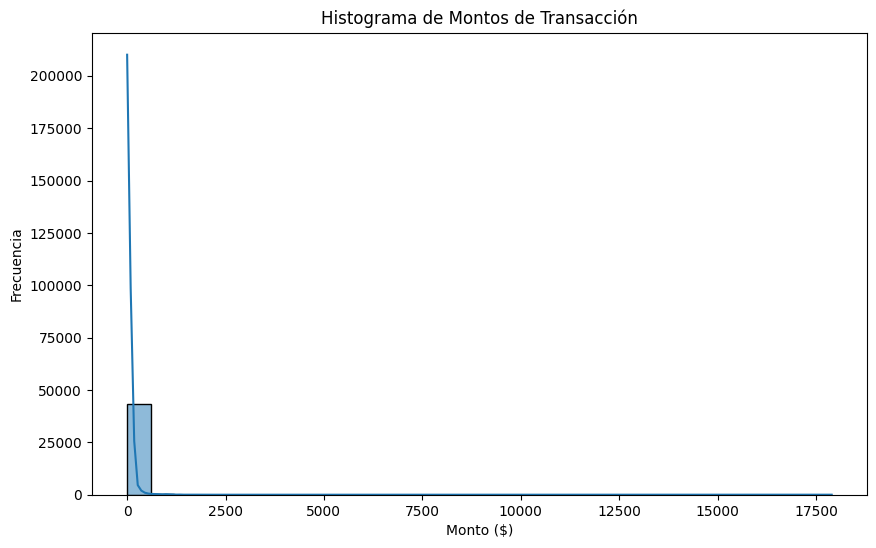

In [196]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amt'], bins=30, kde=True)
plt.title('Histograma de Montos de Transacción')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.show()


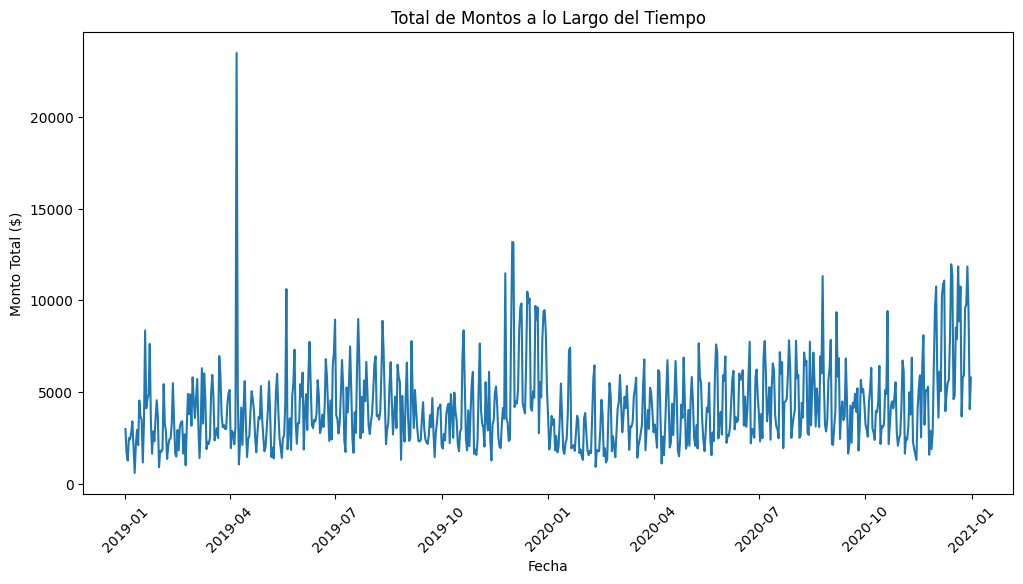

In [197]:
data['date'] = data['trans_date_trans_time'].dt.date
total_daily = data.groupby('date')['amt'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='amt', data=total_daily)
plt.title('Total de Montos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto Total ($)')
plt.xticks(rotation=45)
plt.show()


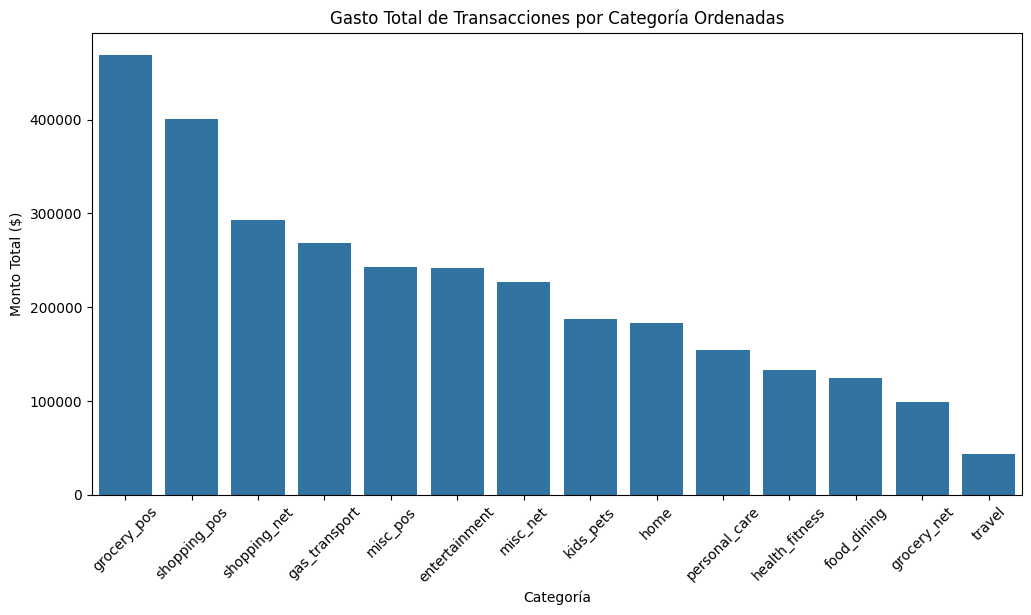

In [198]:
grouped_by_category_sorted = grouped_by_category.sort_values('amt', ascending=False)  
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='amt', data=grouped_by_category_sorted)
plt.title('Gasto Total de Transacciones por Categoría Ordenadas')
plt.xlabel('Categoría')
plt.ylabel('Monto Total ($)')
plt.xticks(rotation=45)
plt.show()


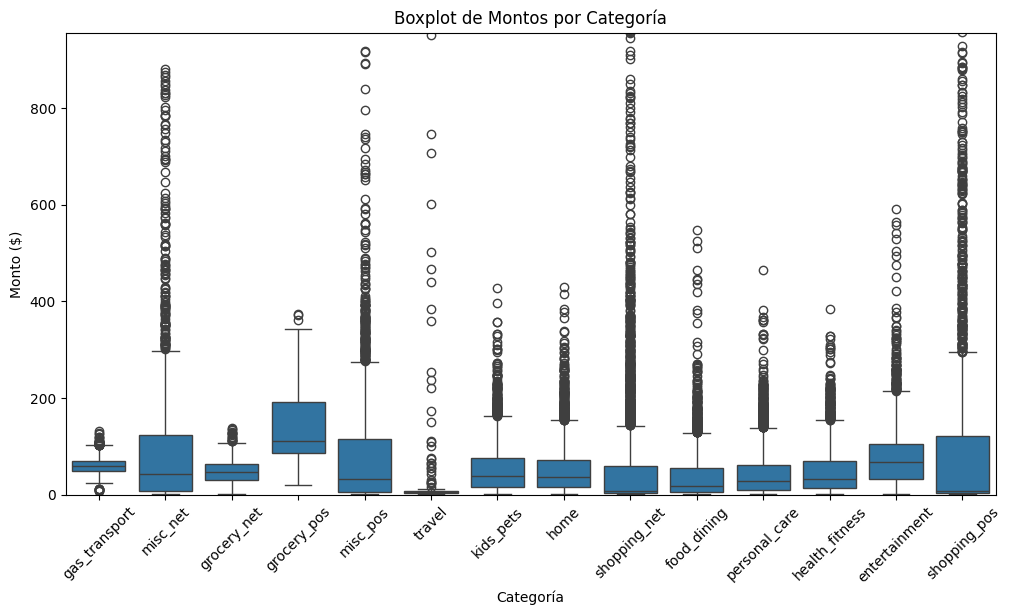

In [199]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=data)
plt.title('Boxplot de Montos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto ($)')
plt.ylim(0, 2 * data['amt'].quantile(0.99))  
plt.xticks(rotation=45)
plt.show()


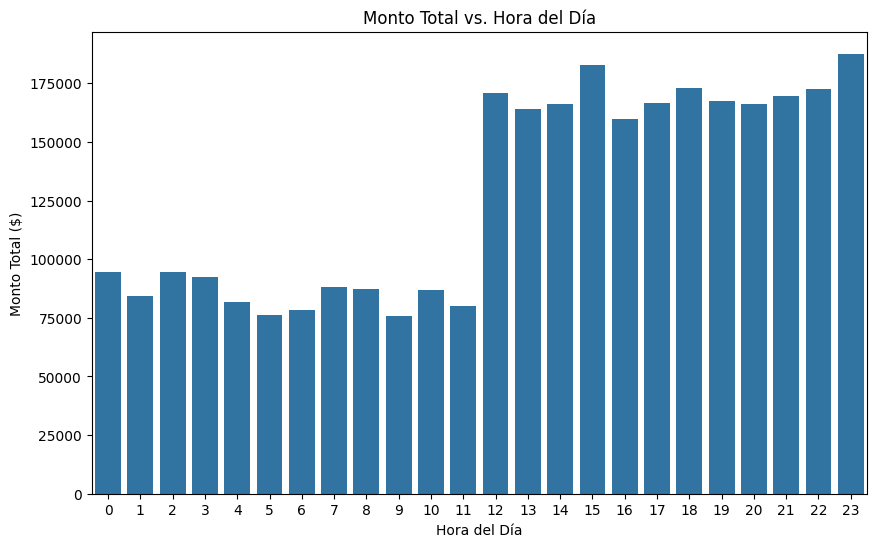

In [200]:
grouped_by_hour = data.groupby('hour')['amt'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='amt', data=grouped_by_hour)
plt.title('Monto Total vs. Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Monto Total ($)')
plt.show()


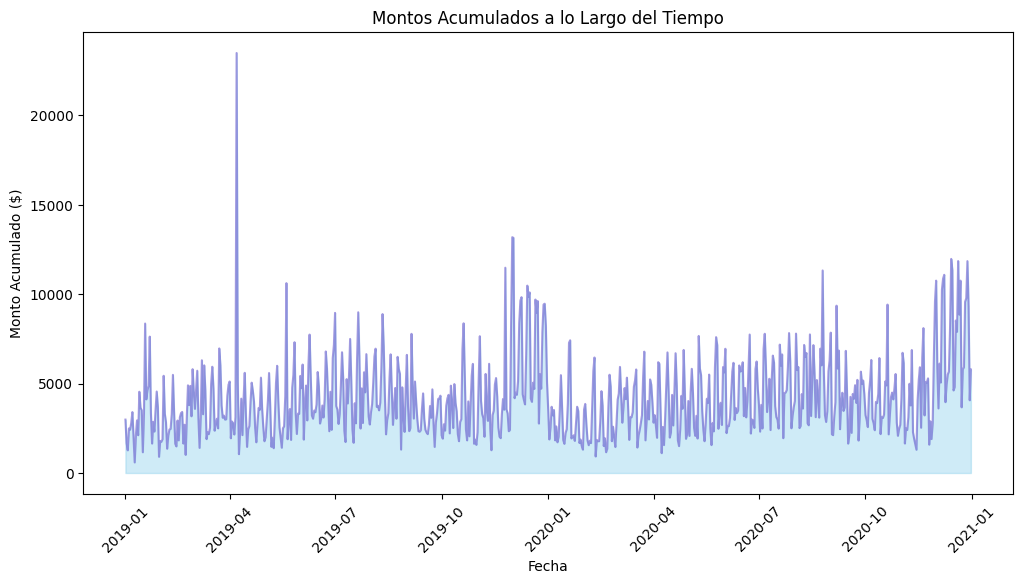

In [201]:
plt.figure(figsize=(12, 6))
plt.fill_between(total_daily['date'], total_daily['amt'], color="skyblue", alpha=0.4)
plt.plot(total_daily['date'], total_daily['amt'], color="Slateblue", alpha=0.6)
plt.title('Montos Acumulados a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto Acumulado ($)')
plt.xticks(rotation=45)
plt.show()


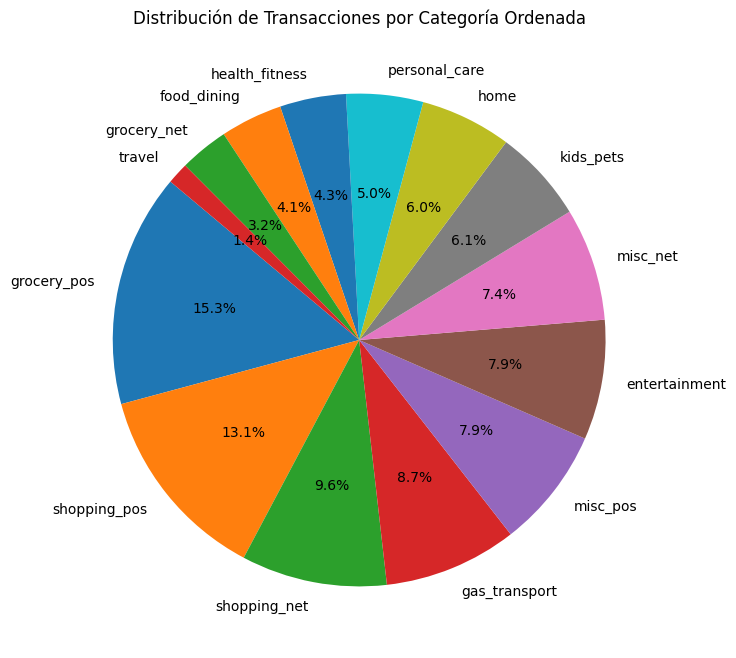

In [202]:
grouped_by_category_sorted = grouped_by_category.sort_values('amt', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(grouped_by_category_sorted['amt'], labels=grouped_by_category_sorted['category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Transacciones por Categoría Ordenada')
plt.show()


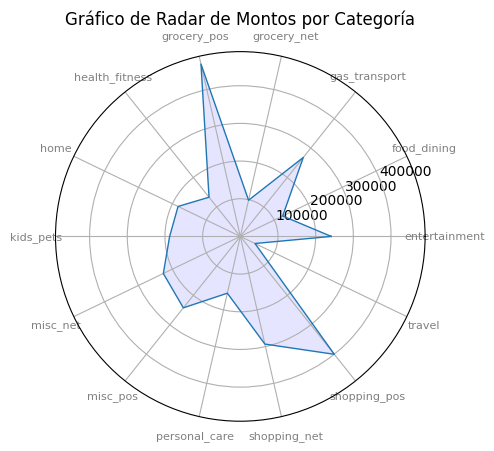

In [203]:
categories = list(grouped_by_category['category'])
N = len(categories)
values = list(grouped_by_category['amt'])

angles = [n / float(N) * 2 * pi for n in range(N)]
values += values[:1]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
plt.title('Gráfico de Radar de Montos por Categoría')
plt.show()


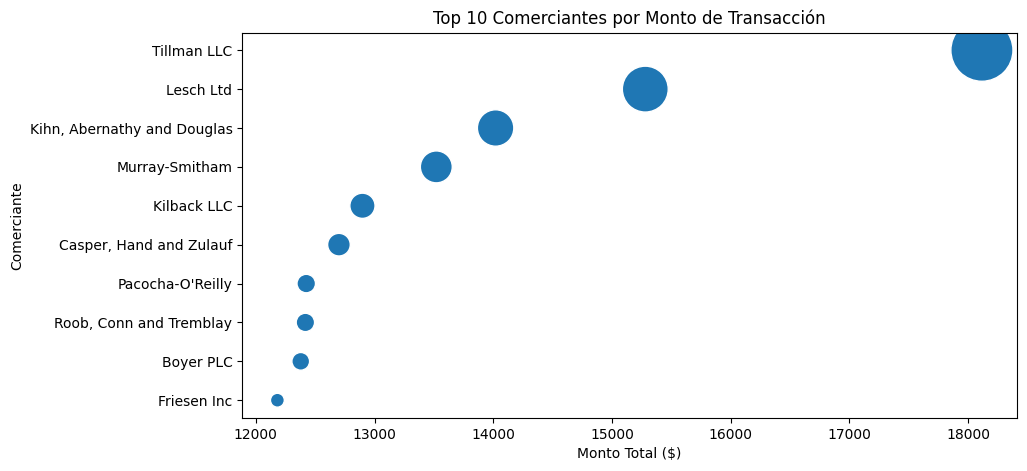

In [204]:
top_merchants = data.groupby('merchant')['amt'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=top_merchants, x='amt', y='merchant', size='amt', legend=False, sizes=(100, 2000))
plt.title('Top 10 Comerciantes por Monto de Transacción')
plt.xlabel('Monto Total ($)')
plt.ylabel('Comerciante')
plt.show()


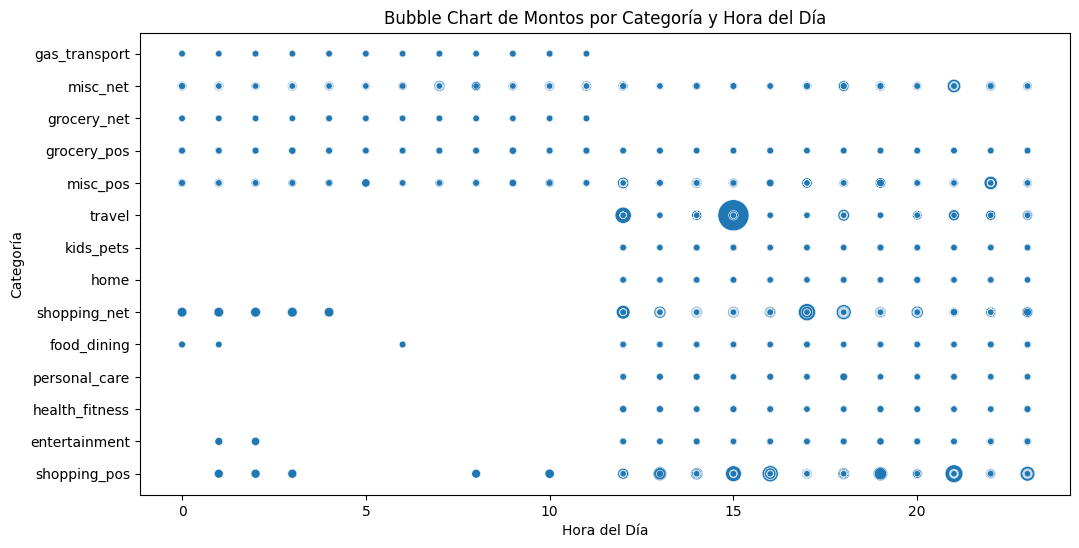

In [205]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='hour', y='category', size='amt', legend=False, sizes=(20, 500))
plt.title('Bubble Chart de Montos por Categoría y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Categoría')
plt.show()


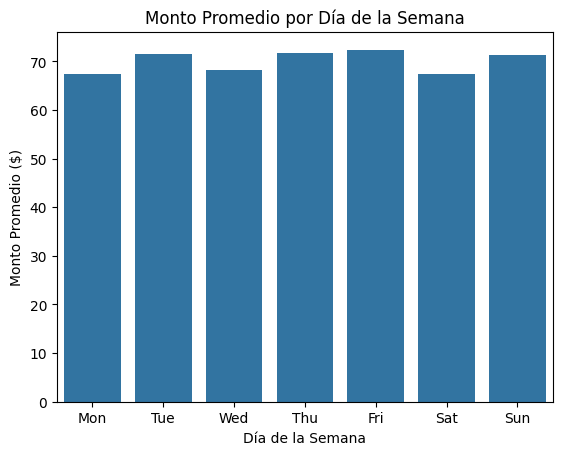

In [206]:
data['weekday'] = data['trans_date_trans_time'].dt.weekday
weekday_avg = data.groupby('weekday')['amt'].mean().reset_index()
sns.barplot(x='weekday', y='amt', data=weekday_avg)
plt.title('Monto Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Monto Promedio ($)')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


C:\Users\memol\AppData\Local\Temp\ipykernel_6520\1171612820.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




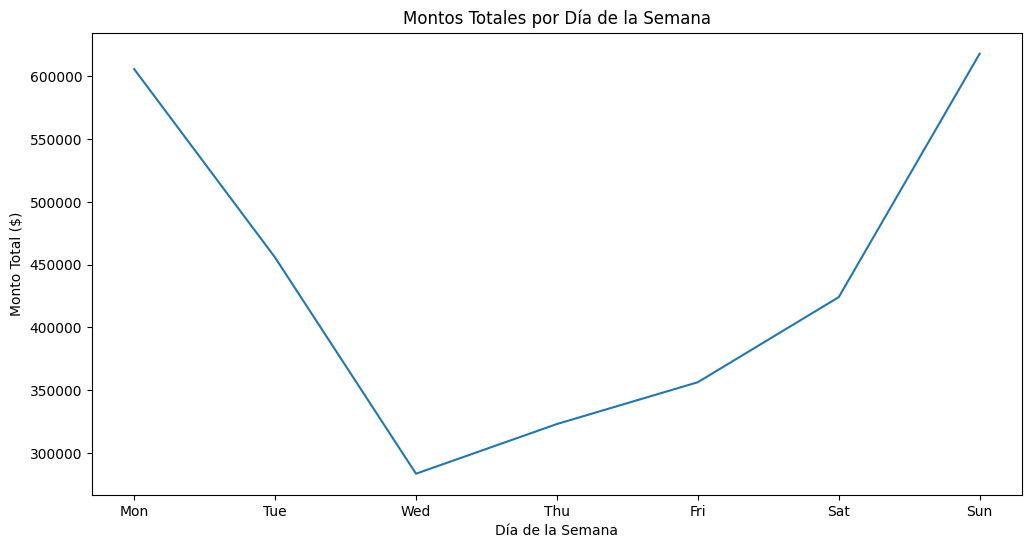

In [207]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday', y='amt', data=data, estimator='sum', ci=None)
plt.title('Montos Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Monto Total ($)')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


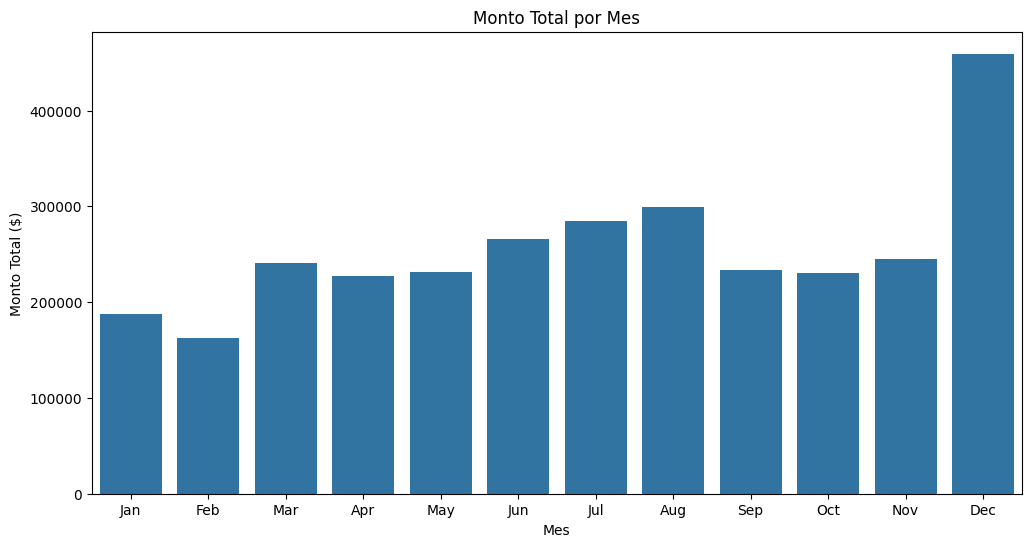

In [208]:
data['month'] = data['trans_date_trans_time'].dt.month
monthly_total = data.groupby('month')['amt'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='amt', data=monthly_total)
plt.title('Monto Total por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto Total ($)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


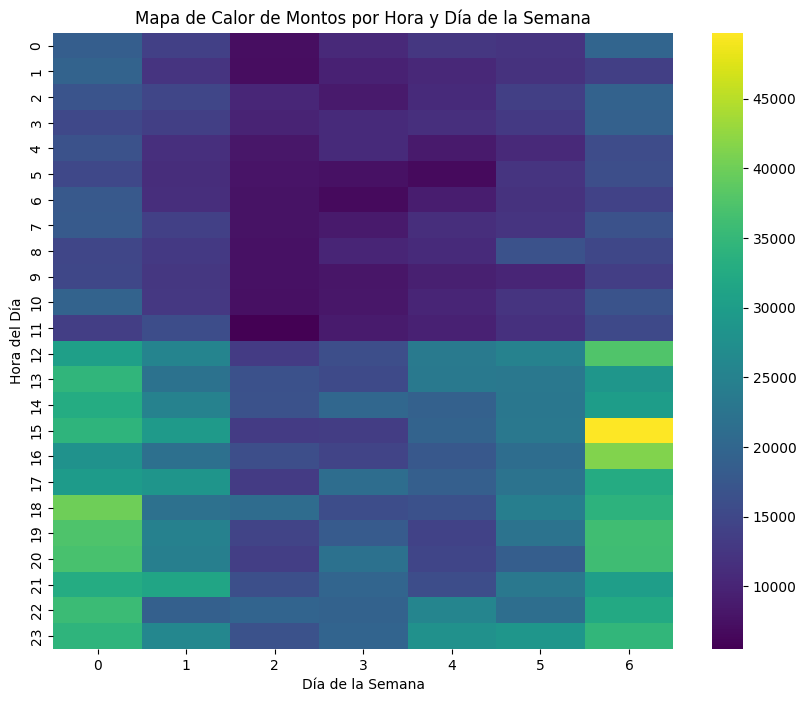

In [209]:
heatmap_data = data.pivot_table(values='amt', index='hour', columns='weekday', aggfunc='sum')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Mapa de Calor de Montos por Hora y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.show()


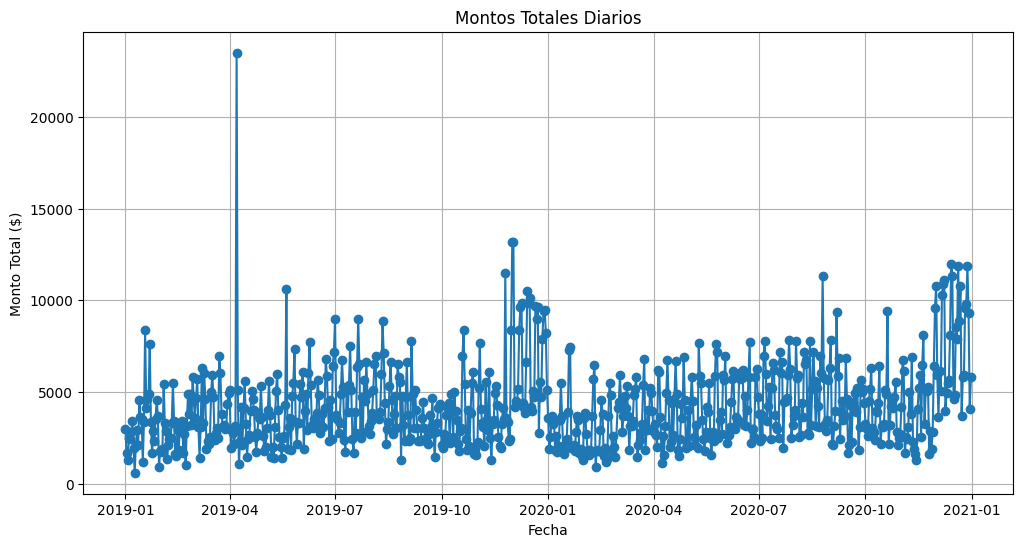

In [210]:
daily_totals = data.groupby(data['trans_date_trans_time'].dt.date)['amt'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_totals.index, daily_totals.values, marker='o', linestyle='-')
plt.title('Montos Totales Diarios')
plt.xlabel('Fecha')
plt.ylabel('Monto Total ($)')
plt.grid(True)
plt.show()


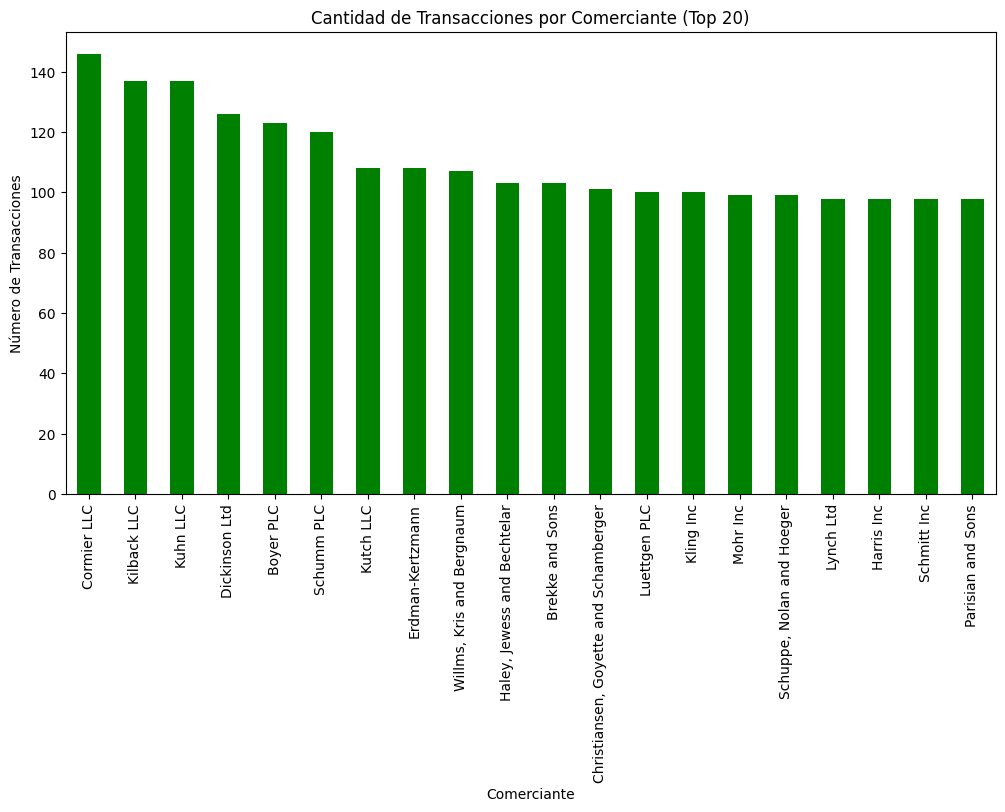

In [211]:
merchant_counts = data['merchant'].value_counts().head(20)
plt.figure(figsize=(12, 6))
merchant_counts.plot(kind='bar', color='green')
plt.title('Cantidad de Transacciones por Comerciante (Top 20)')
plt.xlabel('Comerciante')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=90)
plt.show()


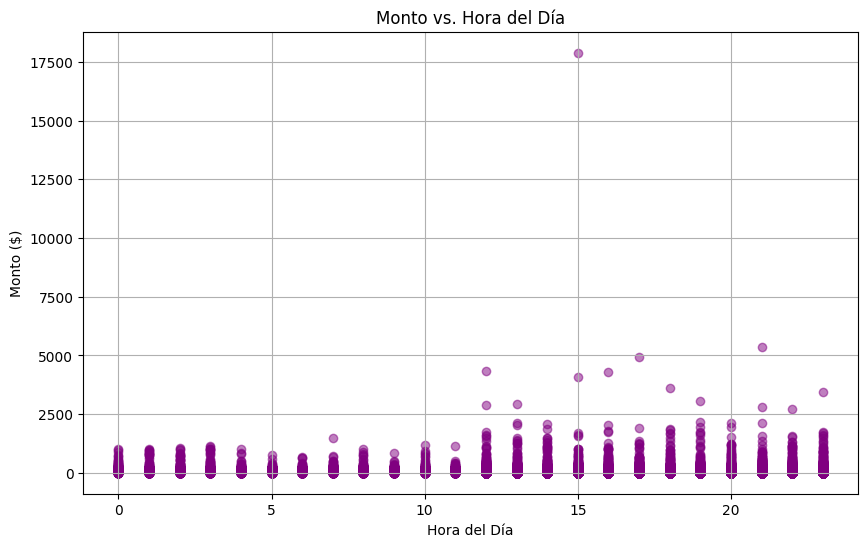

In [212]:
data['hour'] = data['trans_date_trans_time'].dt.hour
plt.figure(figsize=(10, 6))
plt.scatter(data['hour'], data['amt'], alpha=0.5, color='purple')
plt.title('Monto vs. Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Monto ($)')
plt.grid(True)
plt.show()


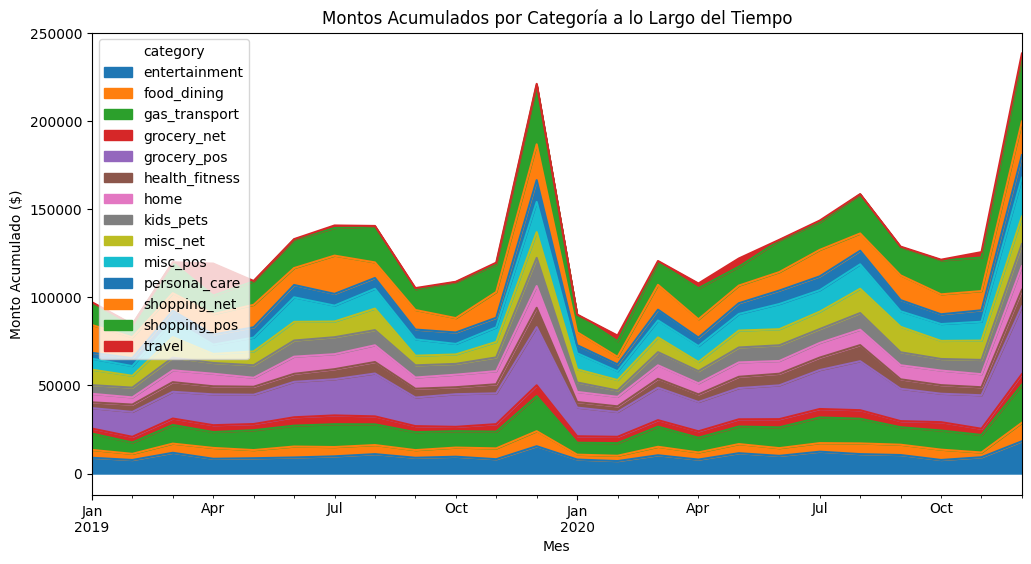

In [213]:
category_time = data.groupby([data['trans_date_trans_time'].dt.to_period('M'), 'category'])['amt'].sum().unstack()
category_time.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Montos Acumulados por Categoría a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Monto Acumulado ($)')
plt.show()


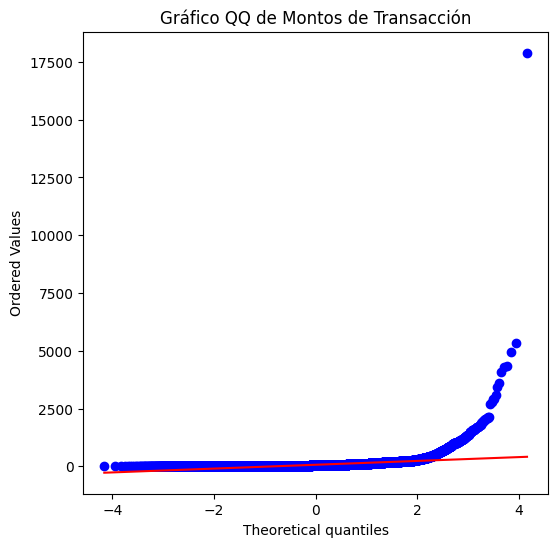

In [215]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(data['amt'], dist="norm", plot=plt)
plt.title('Gráfico QQ de Montos de Transacción')
plt.show()


C:\Users\memol\AppData\Local\Temp\ipykernel_6520\2805583867.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




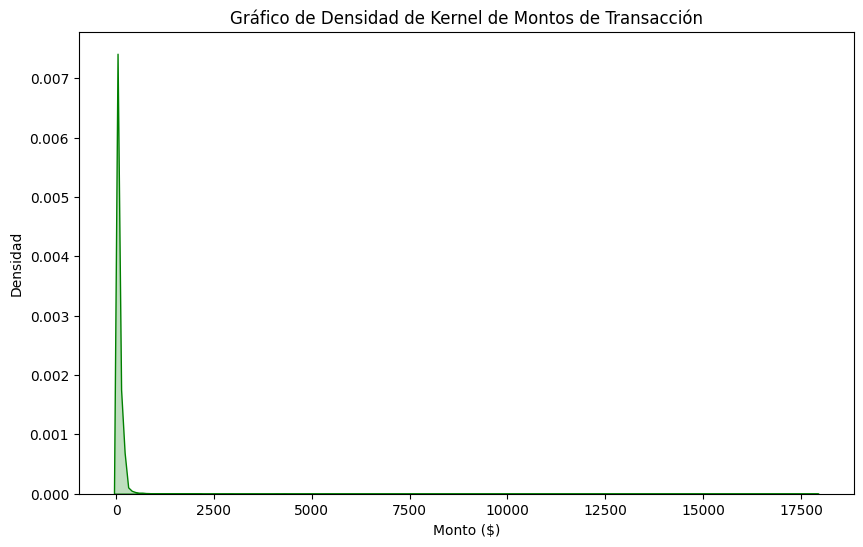

In [216]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['amt'], shade=True, color='green')
plt.title('Gráfico de Densidad de Kernel de Montos de Transacción')
plt.xlabel('Monto ($)')
plt.ylabel('Densidad')
plt.show()


C:\Users\memol\AppData\Local\Temp\ipykernel_6520\473227954.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



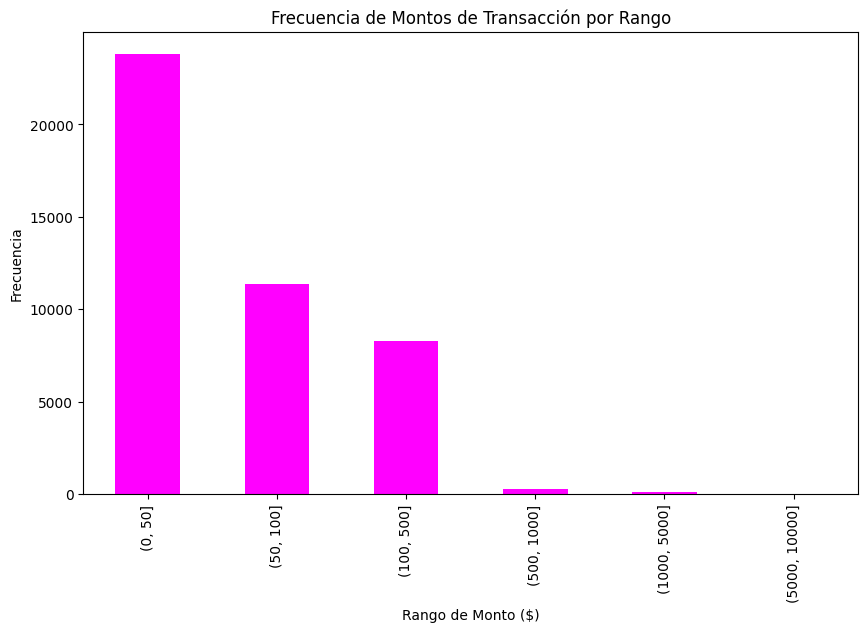

In [217]:
# Crear bins para montos de transacción
bins = pd.cut(data['amt'], bins=[0, 50, 100, 500, 1000, 5000, 10000])
# Contar frecuencias por bin
bin_counts = data.groupby(bins)['amt'].count()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='magenta')
plt.title('Frecuencia de Montos de Transacción por Rango')
plt.xlabel('Rango de Monto ($)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


C:\Users\memol\AppData\Local\Temp\ipykernel_6520\3040349096.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



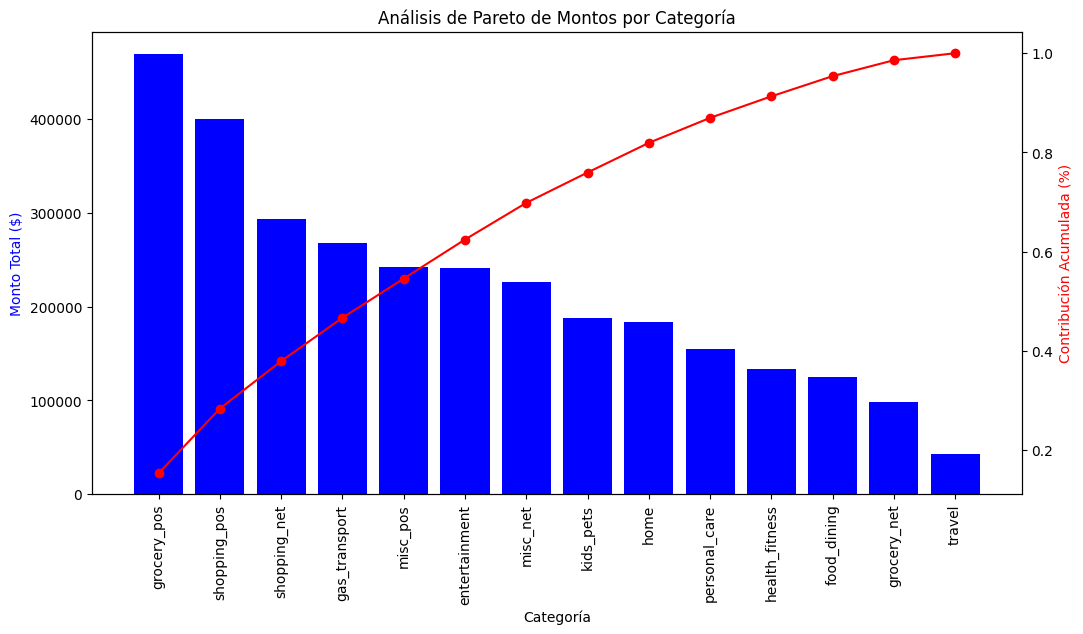

In [218]:
contributions = data.groupby('category')['amt'].sum().sort_values(ascending=False)
cum_contrib = contributions.cumsum() / contributions.sum()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(contributions.index, contributions, color='b')
ax2 = ax1.twinx()
ax2.plot(contributions.index, cum_contrib, color='r', marker='o')

ax1.set_xlabel('Categoría')
ax1.set_ylabel('Monto Total ($)', color='b')
ax2.set_ylabel('Contribución Acumulada (%)', color='r')
ax1.set_title('Análisis de Pareto de Montos por Categoría')
ax1.set_xticklabels(contributions.index, rotation=90)
plt.show()


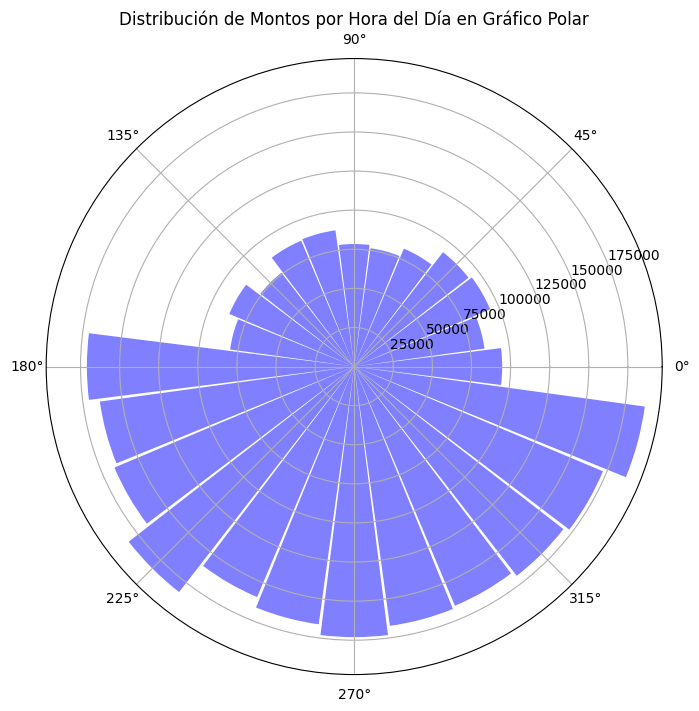

In [219]:
# Agrupar datos por hora del día
hourly_data = data.groupby(data['trans_date_trans_time'].dt.hour)['amt'].sum()

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)
theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)
radii = hourly_data
bars = plt.bar(theta, radii, width=0.25, bottom=0.0, color='b', alpha=0.5)

plt.title('Distribución de Montos por Hora del Día en Gráfico Polar')
plt.show()


C:\Users\memol\AppData\Local\Temp\ipykernel_6520\3399879822.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



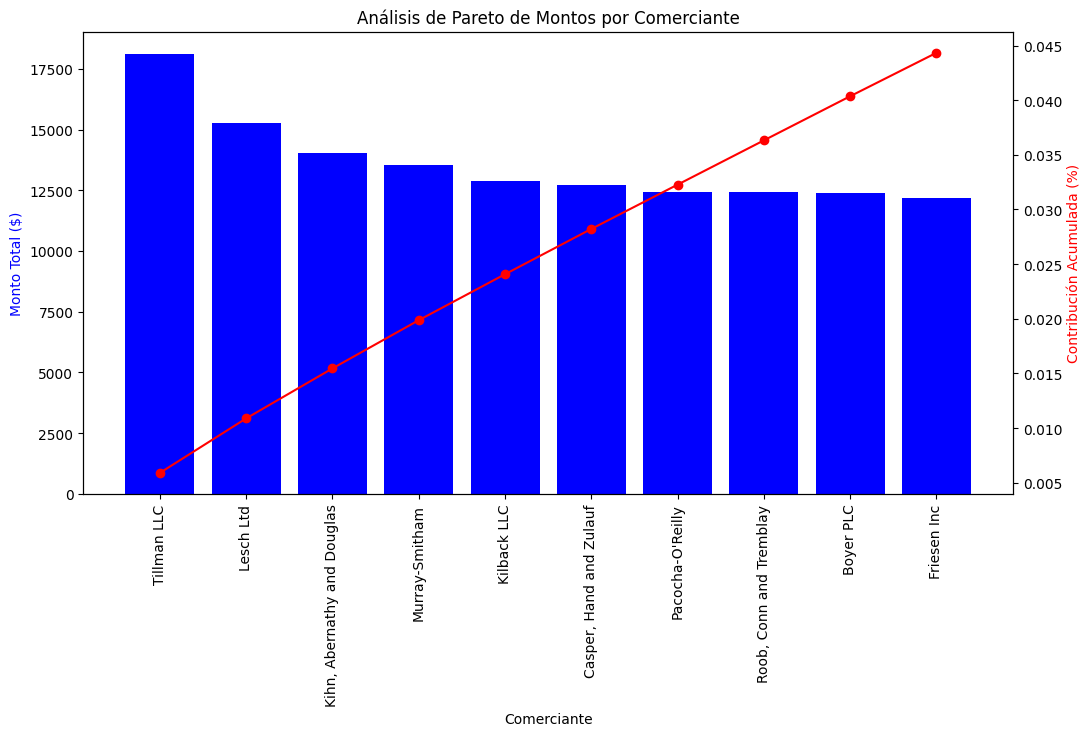

In [220]:
# Calcular contribuciones totales por comerciante
contributions_merchant = data.groupby('merchant')['amt'].sum().sort_values(ascending=False)
cum_contrib_merchant = contributions_merchant.cumsum() / contributions_merchant.sum()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(contributions_merchant.index[:10], contributions_merchant.head(10), color='b')
ax2 = ax1.twinx()
ax2.plot(contributions_merchant.index[:10], cum_contrib_merchant.head(10), color='r', marker='o')

ax1.set_xlabel('Comerciante')
ax1.set_ylabel('Monto Total ($)', color='b')
ax2.set_ylabel('Contribución Acumulada (%)', color='r')
ax1.set_title('Análisis de Pareto de Montos por Comerciante')
ax1.set_xticklabels(contributions_merchant.index[:10], rotation=90)
plt.show()


### EDA INTERÁCTIVO.

In [221]:
hist_fig = px.histogram(data, x='amt', color='category',
                        title='Histograma Interactivo de Montos de Transacción',
                        labels={'amt': 'Monto ($)', 'category': 'Categoría'},
                        category_orders={"category": sorted(data['category'].unique())})
hist_fig.update_layout(bargap=0.1, legend_title_text='Categoría')
hist_fig.show()

In [222]:
# Gráfico de líneas de montos de transacción a lo largo del tiempo
data_sample = data.set_index('trans_date_trans_time').resample('D')['amt'].sum()
line_fig = px.line(data_sample.reset_index(), x='trans_date_trans_time', y='amt', title='Gráfico de Líneas Interactivo de Montos de Transacción a lo largo del Tiempo', labels={'amt': 'Monto Total ($)', 'trans_date_trans_time': 'Fecha'})
line_fig.show()


In [223]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Agrupar los datos por categoría y número de tarjeta, y sumar los montos
grouped_data = data.groupby(['category', 'cc_num'])['amt'].sum().reset_index()
# Convertir cc_num a string para mejorar la distinción de colores
grouped_data['cc_num'] = grouped_data['cc_num'].astype(str)
# Obtener la suma total por categoría para ordenar las barras
total_by_category = grouped_data.groupby('category')['amt'].sum().reset_index()
# Ordenar las categorías por el total descendente
total_by_category_sorted = total_by_category.sort_values('amt', ascending=False)
# Fusionar los datos agrupados con los totales ordenados para mantener el orden de las categorías
grouped_data_sorted = pd.merge(total_by_category_sorted[['category']], grouped_data, on='category', how='left')
# Ordenar los segmentos dentro de cada categoría de menor a mayor
grouped_data_sorted = grouped_data_sorted.sort_values(by=['category', 'amt'])
# Crear un gráfico de barras, donde cada número de tarjeta de crédito tiene un color distinto
bar_fig = px.bar(grouped_data_sorted, x='category', y='amt', color='cc_num',
                title='Gráfico de Barras Interactivo de Transacciones por Categoría, Segmentado por Número de Tarjeta de Crédito',
                labels={'category': 'Categoría', 'amt': 'Gasto Total ($)', 'cc_num': 'Número de Tarjeta de Crédito'},
                category_orders={"category": total_by_category_sorted['category']})
# Mostrar el gráfico
bar_fig.show()